# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### To edit an image making a copy of it is always a good idea!

In [2]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
image = cv2.imread('img/garden.jpg')
garden = image.copy()

In [4]:
image.shape == garden.shape  

True

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

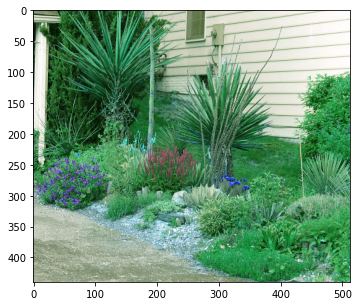

In [12]:
plt.figure(figsize=(10,5))
plt.imshow(garden);

In [13]:
B,G,R = cv2.split(garden)

[Hint](# "cv2.split") 

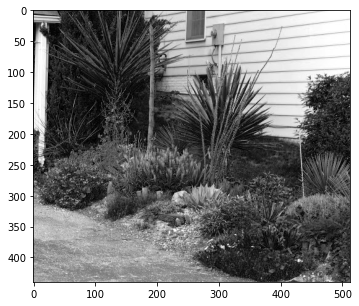

In [23]:
# Show each channel channel on screen
plt.figure(figsize=(10,5))
plt.imshow(B,  cmap='gray'); 

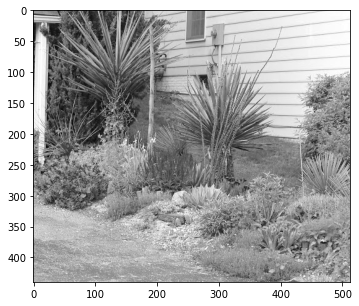

In [22]:
plt.figure(figsize=(10,5))
plt.imshow(G, cmap='gray');

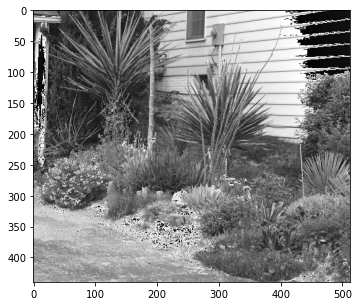

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(R, cmap='gray');

#### Merging the color channels

In [20]:
# Modify a channel and then merge them all again
R = R + 20 

In [24]:
img = cv2.merge([B,G,R])

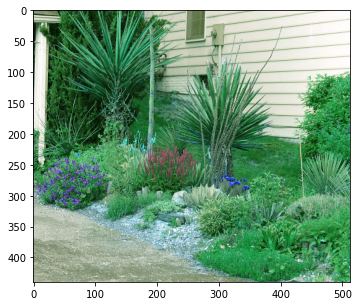

In [25]:
plt.figure(figsize=(10,5))
plt.imshow(garden);

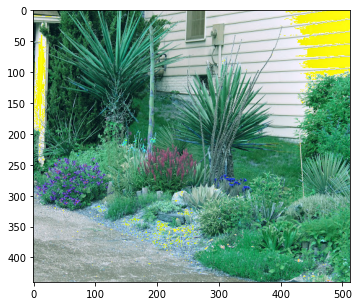

In [26]:
plt.figure(figsize=(10,5))
plt.imshow(img);

[Hint](# "cv2.merge") 

In [27]:
garden.shape

(440, 512, 3)

In [119]:
# Create a black canvas with the same size as the image you loaded
canvas = np.zeros((440, 512), dtype = "uint8")

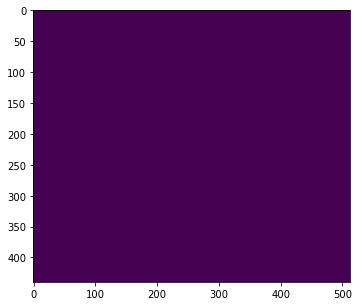

In [121]:
plt.figure(figsize=(10,5))
plt.imshow(canvas);

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [4]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine


In [122]:
canvas_B = cv2.merge([B,canvas,canvas])

In [123]:
canvas.shape, canvas_B.shape 

((440, 512), (440, 512, 3))

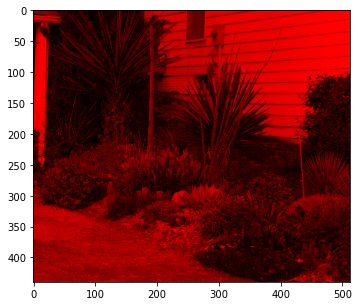

In [124]:
plt.figure(figsize=(10,5))
plt.imshow(canvas_B);

In [126]:
b = cv2.cvtColor(canvas_B, cv2.COLOR_BGR2RGB)

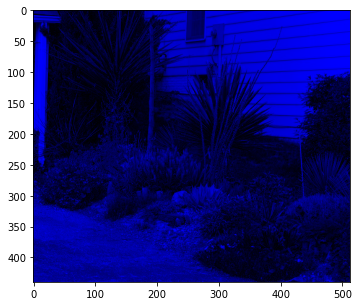

In [127]:
plt.figure(figsize=(10,5))
plt.imshow(b);

In [132]:
canvas_G = cv2.merge([canvas,G, canvas])

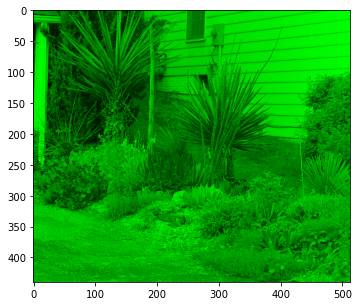

In [133]:
plt.figure(figsize=(10,5))
plt.imshow(canvas_G);

In [134]:
g = cv2.cvtColor(canvas_G, cv2.COLOR_BGR2RGB)

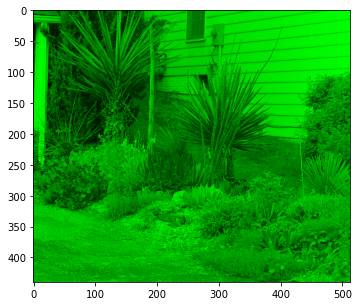

In [135]:
plt.figure(figsize=(10,5))
plt.imshow(g) 

In [136]:
canvas_R = cv2.merge([canvas,canvas,R]) 

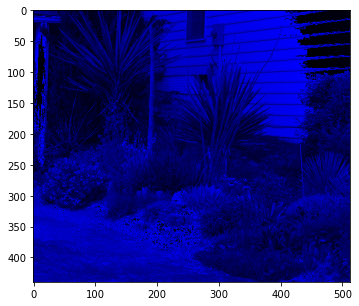

In [137]:
plt.figure(figsize=(10,5))
plt.imshow(canvas_R);

In [138]:
r = cv2.cvtColor(canvas_R, cv2.COLOR_BGR2RGB)

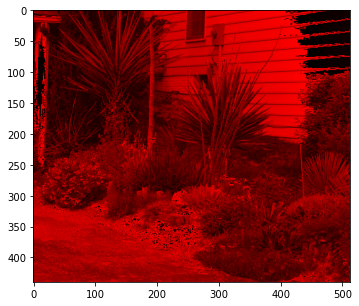

In [139]:
plt.figure(figsize=(10,5))
plt.imshow(r);

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

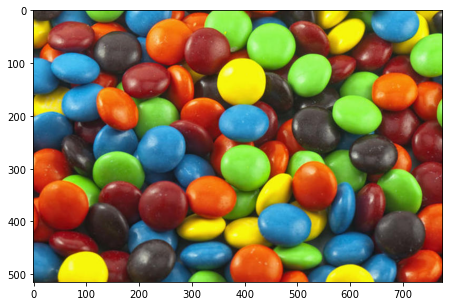

In [157]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (10,5));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [76]:
hsv =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

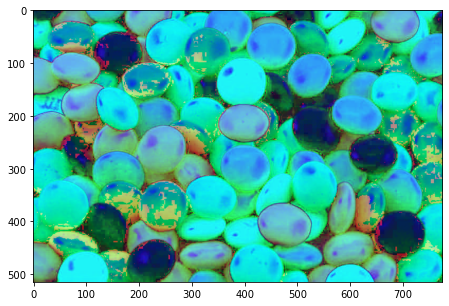

In [77]:
plt.figure(figsize = (10,5));
plt.imshow(hsv);

[Hint](# "cv2.cvtColor") 

In [78]:
# Split the H,S and V channels 
H, S, V = cv2.split(hsv)

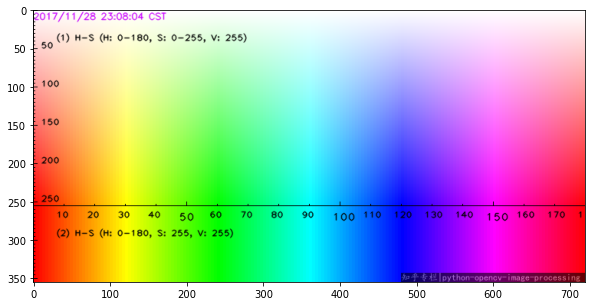

In [75]:
hsv_map = cv2.imread('img/hsv.png')
hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,5));
plt.imshow(hsv_map);

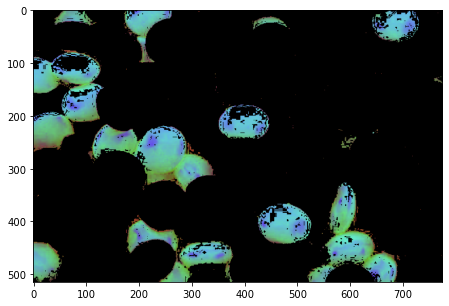

In [79]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
hsv_img = hsv.copy()

lower_range = (100,50,20)
upper_range = (160,255,255)

mask_blue = cv2.inRange(hsv_img, lower_range, upper_range)
hsv_img[mask_blue == 0] = [0,0,0]

plt.figure(figsize = (10,5))
plt.imshow(hsv_img);

[Hint](# "cv2.inRange") 

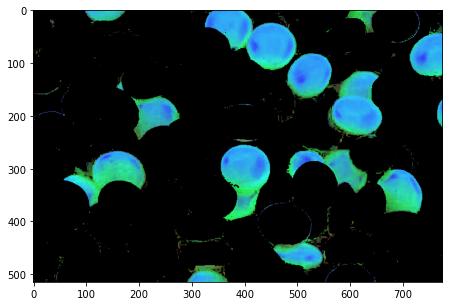

In [82]:
# Repeat the same but now with the greens
hsv_green = hsv.copy()

lower_range = (35,50,20)
upper_range = (90,255,255)

mask_green = cv2.inRange(hsv_green, lower_range, upper_range)
hsv_green[mask_green == 0] = [0,0,0]

plt.figure(figsize = (10,5))
plt.imshow(hsv_green);

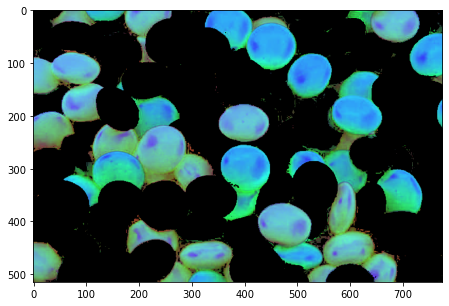

In [87]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
hsv_both = hsv.copy()

lower_range = (35,50,20)
upper_range = (160,255,255)

mask = cv2.inRange(hsv_both, lower_range, upper_range)
hsv_both[mask == 0] = [0,0,0]

plt.figure(figsize = (10,5))
plt.imshow(hsv_both);

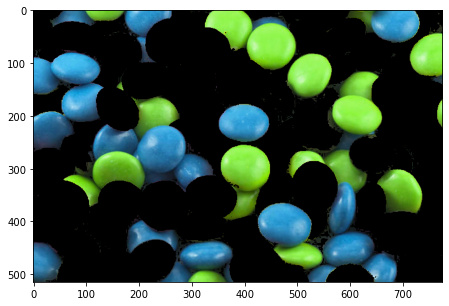

In [89]:
plt.figure(figsize = (10,5))
plt.imshow(cv2.cvtColor(hsv_both,cv2.COLOR_HSV2RGB));

In [152]:
rgb_image = cv2.cvtColor(hsv_both,cv2.COLOR_HSV2RGB)

In [154]:
rgb_img = rgb_image.copy()

In [159]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

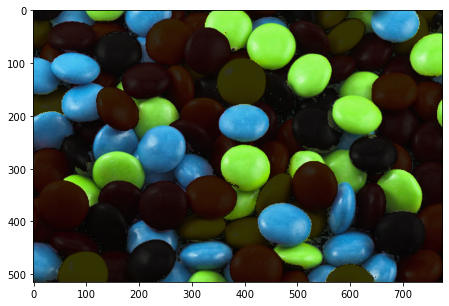

In [164]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

opacity = 0.8

#make sure both images have been converted to rgb
joined_hsv = cv2.addWeighted(rgb_img, opacity, img2, 1-opacity, 0)

plt.figure(figsize = (10,5))
plt.imshow(joined_hsv);

[Hint](# "cv2.addWeighted") 

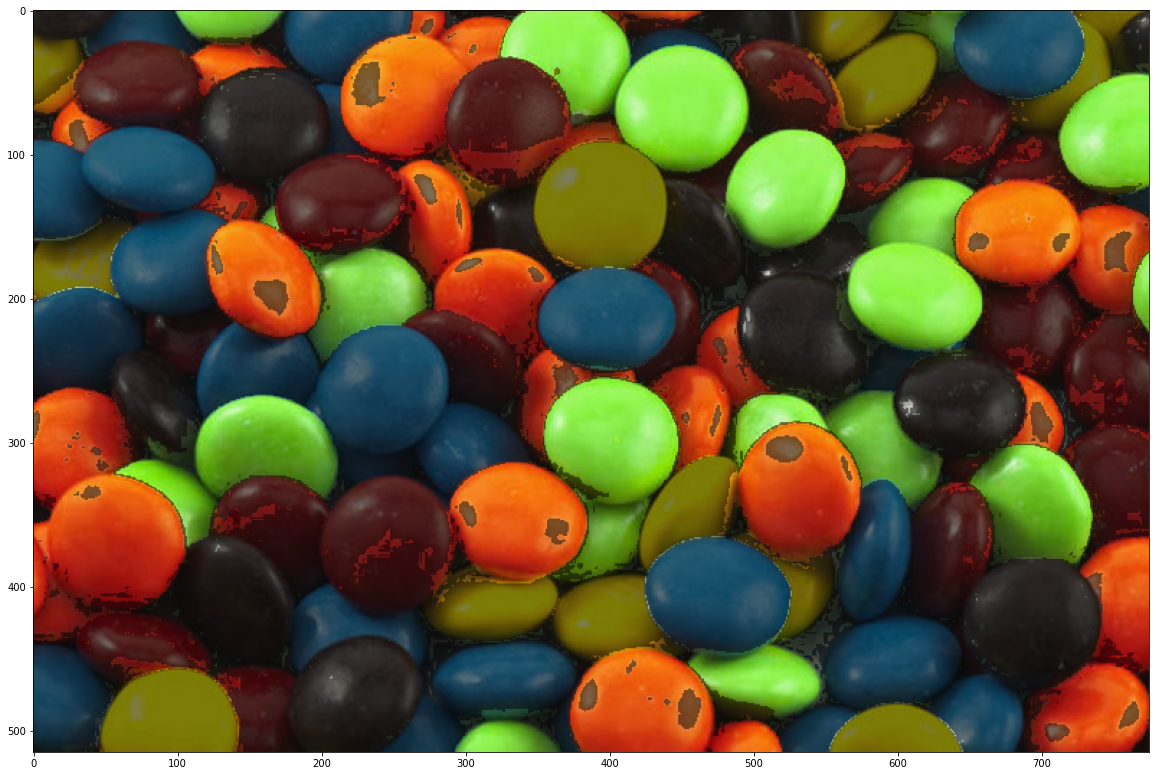

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

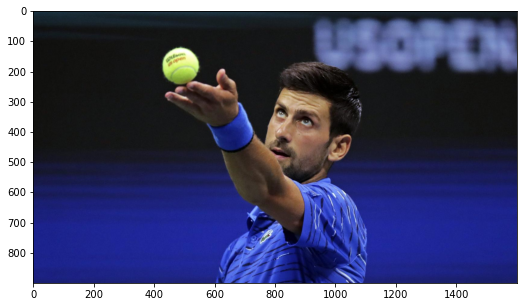

In [181]:
image = cv2.imread('img/ball.jpg')
ball = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(ball);

In [182]:
ball_hsv = cv2.cvtColor(ball, cv2.COLOR_RGB2HSV)

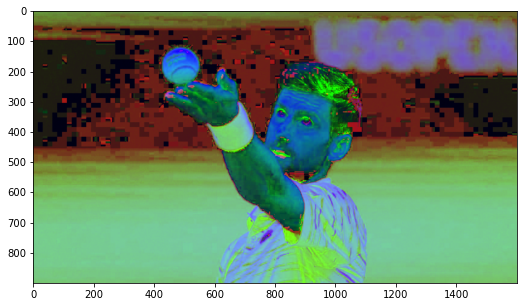

In [183]:
plt.figure(figsize=(10,5))
plt.imshow(ball_hsv);

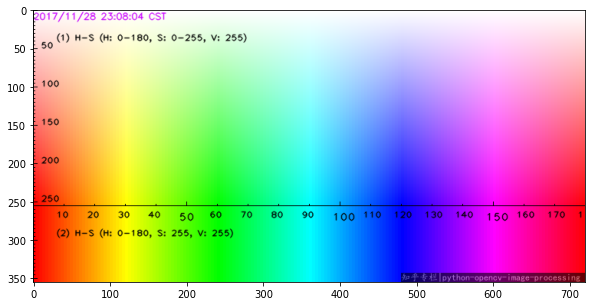

In [168]:
plt.figure(figsize = (10,5))
plt.imshow(hsv_map);

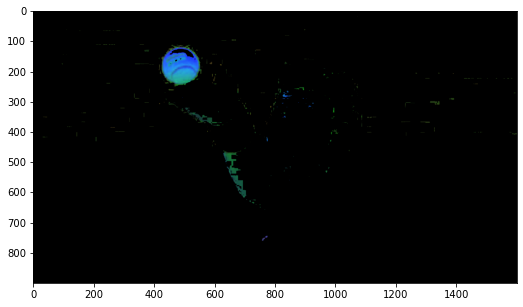

In [184]:
lower_range = (20,50,20)
upper_range = (80,255,255)

mask_ball = cv2.inRange(ball_hsv, lower_range, upper_range)
ball_hsv[mask_ball == 0] = [0,0,0]

plt.figure(figsize = (10,5))
plt.imshow(ball_hsv);

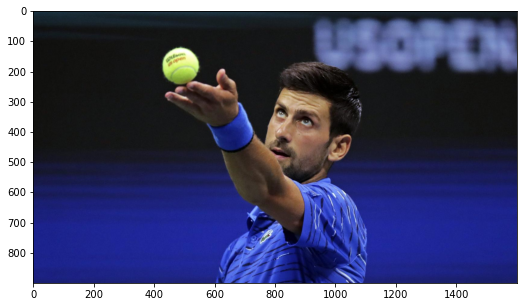

In [185]:
plt.figure(figsize=(10,5))
plt.imshow(ball);

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?